<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Приоретизация-гипотез" data-toc-modified-id="Приоретизация-гипотез-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Приоретизация гипотез</a></span><ul class="toc-item"><li><span><a href="#Метод-ICE" data-toc-modified-id="Метод-ICE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Метод ICE</a></span></li><li><span><a href="#Метод-RICE" data-toc-modified-id="Метод-RICE-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Метод RICE</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-результатов-A/B-теста" data-toc-modified-id="Анализ-результатов-A/B-теста-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ результатов A/B-теста</a></span><ul class="toc-item"><li><span><a href="#Куммулятивные-показатели" data-toc-modified-id="Куммулятивные-показатели-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Куммулятивные показатели</a></span></li><li><span><a href="#Определение-границ-аномалий" data-toc-modified-id="Определение-границ-аномалий-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Определение границ аномалий</a></span></li><li><span><a href="#Статистическая-значимость" data-toc-modified-id="Статистическая-значимость-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Статистическая значимость</a></span><ul class="toc-item"><li><span><a href="#Сравнение-&quot;сырых&quot;-данных" data-toc-modified-id="Сравнение-&quot;сырых&quot;-данных-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Сравнение "сырых" данных</a></span></li><li><span><a href="#Сравнение-&quot;очищенных&quot;-данных" data-toc-modified-id="Сравнение-&quot;очищенных&quot;-данных-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Сравнение "очищенных" данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Отчёт" data-toc-modified-id="Отчёт-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Отчёт</a></span></li></ul></div>

# Принятие решений в бизнесе на основе данных

**Заказчик исследования:** отдел маркетинга крупного интернет-магазина.

**Цель:** приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**Задачи:**
1. Импортировать данные и ознакомиться с ними;
2. Подготовить данные к анализу;
3. Приоретизировать гипотезы фреймворками ICE и RICE;
4. Проанализировать результаты A/B-теста;
5. Принять решение по результату теста, сформулировать выводы рекомендации.

**Входные данные:** датасет с гипотезами по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort и данные с результатами проведённого A/B-теста.

## Изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import math as mth
import matplotlib.pyplot as plt
import datetime as dt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150

In [2]:
hypothesis = pd.read_csv('/Users/maksimblazko/Desktop/python/projects/ab_test/hypothesis.csv')
visitors = pd.read_csv('/Users/maksimblazko/Desktop/python/projects/ab_test/visitors.csv')
orders = pd.read_csv('/Users/maksimblazko/Desktop/python/projects/ab_test/orders.csv')

Импортировали библиотеки, которые пригодяться в работе. Загрузим датасеты, ознакомимся с данными и оценим необходимость первых преобразований на этапе предобработки.

In [3]:
display(hypothesis.sample(5))
hypothesis.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
display(visitors.sample(5))
visitors.info()

visitors.duplicated().sum()

,date,group,visitors
33,2019-08-03,B,509
27,2019-08-28,A,594
20,2019-08-21,A,646
3,2019-08-04,A,717
34,2019-08-04,B,770


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


0

In [5]:
display(orders.sample(5))
orders.info()

orders.duplicated().sum()

,transactionId,visitorId,date,revenue,group
791,3525952977,2888793654,2019-08-30,13770,A
646,3796946799,4095180727,2019-08-26,4620,A
851,986374747,949750571,2019-08-27,590,A
743,3603576309,4133034833,2019-08-09,67990,A
1071,3348489190,3112126740,2019-08-12,7690,A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


0

In [6]:
orders[orders['group'] == 'A']['visitorId'].drop_duplicates().isin(orders[orders['group'] == 'B']['visitorId']).value_counts()

False    445
True      58
Name: visitorId, dtype: int64

Пропусков и дубликатов нет, это хорошо.

В таблице с гипотезами приведём названия столбцов к нижнему регистру.

В таблицах с посетителями и заказами изменим формат в столбцах с датами на подходящий. Хотел привести столбцы с группами к категориальному типу, но "поймал" ошибку при выхзове аггрегирующей функции на этапе анализа данных. Получил опыт поиска ошибки и закомментил этот неверный шаг)

## Предобработка данных

In [7]:
hypothesis.columns = hypothesis.columns.str.lower()

visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
#visitors['group'] = visitors['group'].astype('category')

orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
#orders['group'] = orders['group'].astype('category')

Предобработка получилась небольшой, можно поблагодарить за это коллег, отвечающих за архитектуру и наполнения данных и предоставивших их, после чего переходить к анализу.

## Приоретизация гипотез

Как мы уже знаем, проверка гипотез стоит дорого и все их протестировать, как правило, не удаётся. Чтобы определиться, какую тестировать в первую очередь, прибегнем к методам приоретизации, исходя из метрик, которые присвоили каждой из гипотез коллеги из маркетингового отдела.

### Метод ICE

ICE (от англ. impact, confidence, effort  «влияние, уверенность, усилия») позволяет приоретизировать задачи, исходя из оценок. Найдём показатель для каждой из гипотез, добавим соответствующий столбец в таблицу и выведем ранжированный список.

In [8]:
hypothesis['ice'] = (
    (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
).round()
display(hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0


В топ-3 акция, новые каналы продвижения и форма подписки.

### Метод RICE

В игру вступает рейтинг охвата предлагаемого изменения: сколько пользователей "затронет" новая гипотеза.

In [9]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
display(hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False))

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


В топ-5 те же гипотезы, что и при методе ICE, но порядок их изменился. Теперь с большим отрывом по рейтингу лидирует форма для сбора e-mail адресов на страницах интернет-магазина.

### Вывод

Дополнительная метрика способна изменить итоговый рейтинг приоритетных гипотез, как показатель охвата аудитории в нашем примере. Но и тот факт, что топ-5 по составу не изменился, свидетельствует о валидной оценке метрик гипотез.

Это не является истиной всегда, но, в данном случае оценки гипотез, лучше использовать все имеющиеся для этого данные и не игнорировать охват предлагаемых изменений. То есть, выбирать метод RICE.

## Анализ результатов A/B-теста

### Куммулятивные показатели

Начнём с графического анализа куммулятивных показателей: выручки, среднего чека и конверсии, а так же их производных (относительных группы B к группе A).

In [10]:
dates_groups = orders[['date','group']].drop_duplicates()

orders_aggregated = dates_groups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                    orders['group'] == x['group'])]\
    .agg({'date': 'max', 'group': 'max', 'transactionId': pd.Series.nunique,
          'visitorId': pd.Series.nunique, 'revenue': 'sum'}), axis=1
).sort_values(by=['date', 'group'])

visitors_aggregated = dates_groups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                     visitors['group'] == x['group'])]\
    .agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}), axis=1
).sort_values(by=['date', 'group'])

cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative_data['conversions'] = cumulative_data['orders'] / cumulative_data['visitors']
cumulative_data['avg_check'] = cumulative_data['revenue'] / cumulative_data['orders']

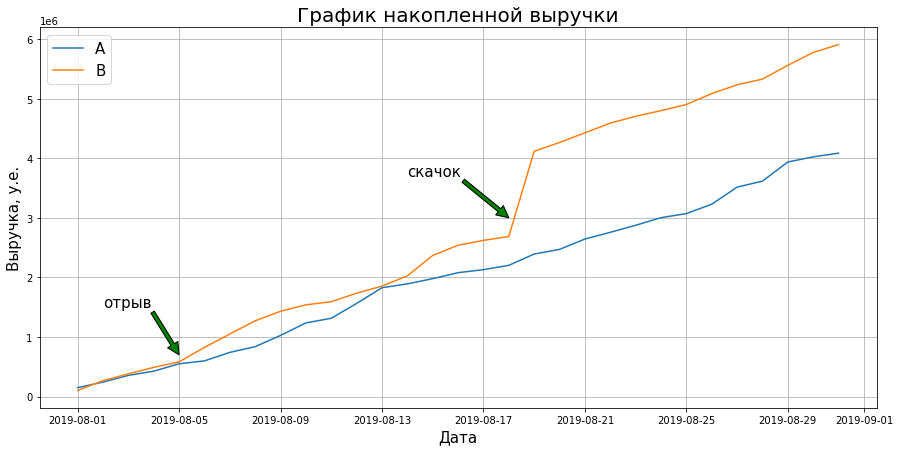

In [11]:
plt.figure(figsize=(15, 7))

plt.plot(
    cumulative_data[cumulative_data['group'] == 'A']['date'],
    cumulative_data[cumulative_data['group'] == 'A']['revenue'],
    label = 'A'
);

plt.plot(
    cumulative_data[cumulative_data['group'] == 'B']['date'],
    cumulative_data[cumulative_data['group'] == 'B']['revenue'],
    label = 'B'
);

plt.title('График накопленной выручки', fontsize=20)
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Выручка, у.е.', fontsize=15)
plt.grid(True)
plt.legend(fontsize=15)

plt.annotate('скачок', xy=('2019-08-18', 3000000), xytext=('2019-08-14', 3700000),
            arrowprops=dict(facecolor='g'), fontsize=15)
plt.annotate('отрыв', xy=('2019-08-05', 700000), xytext=('2019-08-02', 1500000),
            arrowprops=dict(facecolor='g'), fontsize=15) 

plt.show()

Выручка, полученная от пользователей из группы B больше, но на графики виден явный всплеск с 18 на 19 августа. Он создал большой отрыв по выручке от группы A, но это, скорее, шум, а не эффект от A/B-теста.

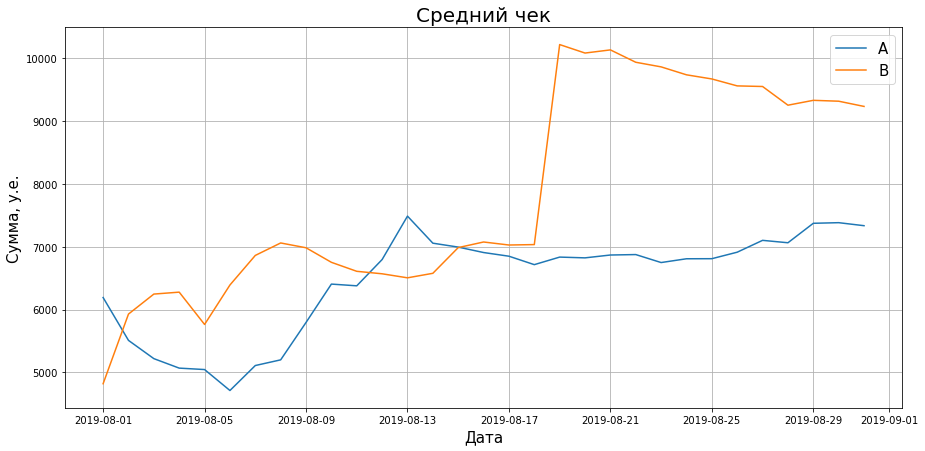

In [12]:
plt.figure(figsize=(15, 7))

plt.plot(
    cumulative_data[cumulative_data['group'] == 'A']['date'],
    cumulative_data[cumulative_data['group'] == 'A']['avg_check'],
    label = 'A'
)

plt.plot(
    cumulative_data[cumulative_data['group'] == 'B']['date'],
    cumulative_data[cumulative_data['group'] == 'B']['avg_check'],
    label = 'B'
)

plt.title('Средний чек', fontsize=20)
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Сумма, у.е.', fontsize=15)
plt.grid(True)
plt.legend(fontsize=15) 

plt.show()

Ближе к концу теста, тренд среднего чека устанавливается: в группе A он сохраняется в районе 7000, а в группе B он уменьшается, отыгрывая обратно всплеск выдающегося заказа от 18-19 августа. Для группы B будет предпочтительно удалить аномальные заказы.

In [13]:
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A'][['date', 'avg_check', 'conversions']]
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B'][['date', 'avg_check', 'conversions']]

cumulative_data_b_on_a = cumulative_data_a.merge(
    cumulative_data_b, on='date', how='left', suffixes=['A', 'B']
)

cumulative_data_b_on_a['avg_check_b_on_a'] = (
    cumulative_data_b_on_a['avg_checkB'] /cumulative_data_b_on_a['avg_checkA']
)
cumulative_data_b_on_a['conversions_b_on_a'] = (
    cumulative_data_b_on_a['conversionsB'] / cumulative_data_b_on_a['conversionsA']
)

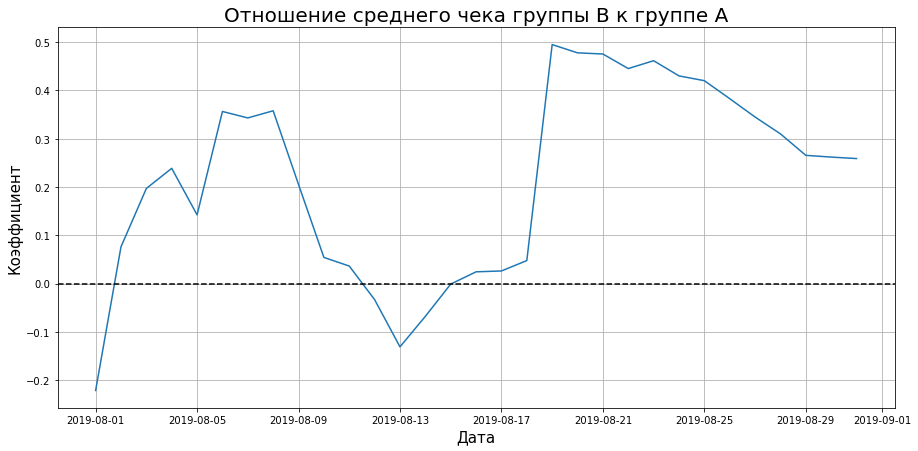

In [14]:
plt.figure(figsize=(15, 7))

plt.plot(
    cumulative_data_b_on_a['date'],
    cumulative_data_b_on_a['avg_check_b_on_a'] - 1
)



plt.title('Отношение среднего чека группы B к группе A', fontsize=20)
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Коэффициент', fontsize=15)
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--')

plt.show()

У графика несколько всплесков, в том числе уже известный нам от 18-19 августа. Общего тренда за период наблюдений, график так и не получил. Судя по данным, стоит продолжить наблюдение, исключив артефакты, приведшие к всплескам.

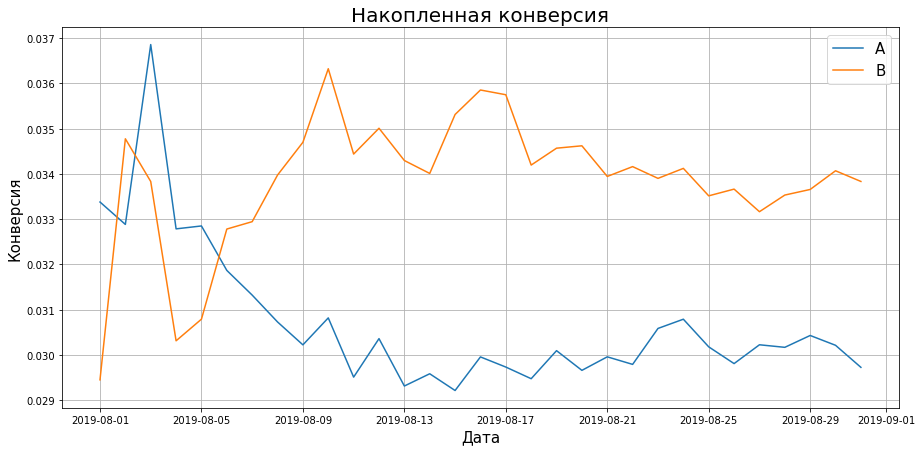

In [15]:
plt.figure(figsize=(15, 7))

plt.plot(
    cumulative_data[cumulative_data['group'] == 'A']['date'],
    cumulative_data[cumulative_data['group'] == 'A']['conversions'],
    label = 'A'
)

plt.plot(
    cumulative_data[cumulative_data['group'] == 'B']['date'],
    cumulative_data[cumulative_data['group'] == 'B']['conversions'],
    label = 'B'
)

plt.title('Накопленная конверсия', fontsize=20)
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Конверсия', fontsize=15)
plt.grid(True)
plt.legend(fontsize=15) 

plt.show()

Начало наблюдения было подвержено "шумам" и всплескам в значениях, однако, уже спустя неделю наблюдений, статистика устоялась. Можно сделать вывод о том, что пользователи группы B делают покупки на 3-5% чаще, чем пользователи группы A.

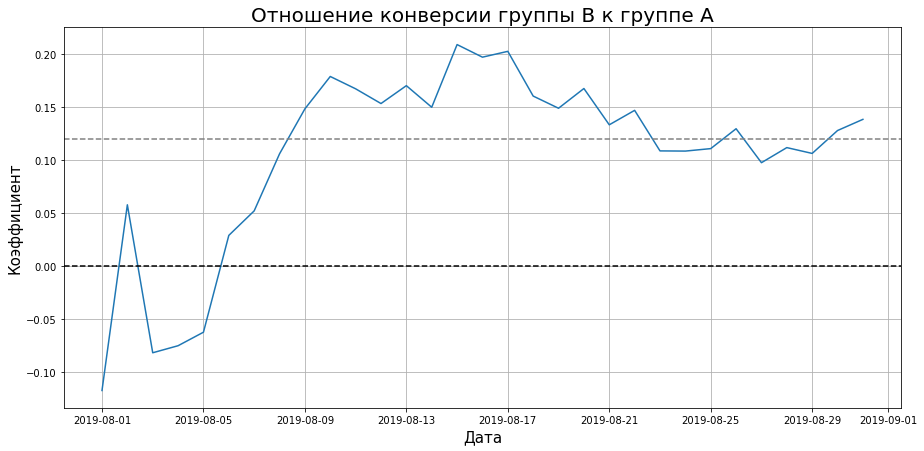

In [16]:
plt.figure(figsize=(15, 7))

plt.plot(
    cumulative_data_b_on_a['date'],
    cumulative_data_b_on_a['conversions_b_on_a'] - 1
)

plt.title('Отношение конверсии группы B к группе A', fontsize=20)
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Коэффициент', fontsize=15)
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.12, color='grey', linestyle='--')

plt.show()

В первую неделю теста, пока данные были подвержены сильным изменениям по причине малого количества собранной информации и была ошибка "подглядывания", группа B проигрывала по конверсии. Но всё оставшееся время, группа B показывает лучшую конверсию без особенных тенденций в ту или иную сторону.

### Определение границ аномалий

Чтобы "очистить" данные от всплесков и оценить влияние изменения, применённого к группе B, найдём исключительные выдающиеся всплески по количеству и сумме заказы.

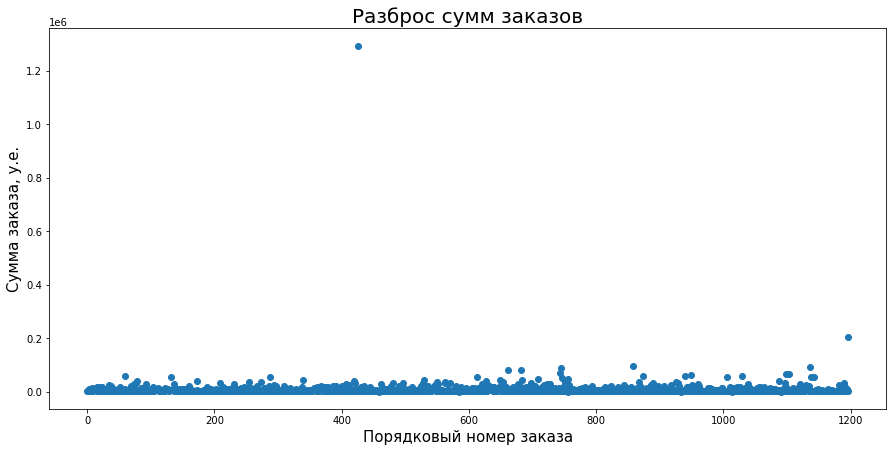

95% заказов не дороже 28000 у.е.
99% заказов не дороже 58233 у.е.


In [17]:
x_values_rev = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(15, 7))

plt.scatter(x_values_rev, orders['revenue'])

plt.title('Разброс сумм заказов', fontsize=20)
plt.xlabel('Порядковый номер заказа', fontsize=15)
plt.ylabel('Сумма заказа, у.е.', fontsize=15) 

plt.show()

print('95% заказов не дороже {:.0f} у.е.'.format(np.percentile(orders['revenue'], 95)))
print('99% заказов не дороже {:.0f} у.е.'.format(np.percentile(orders['revenue'], 99)))

На графике видно, что выборка достаточно однородна, если судить по стоимости заказов. Определим верхний порог в 99-й перцентиль, то есть равный 58233.

Определимся, что считать аномалией в количестве заказов одного пользователя.

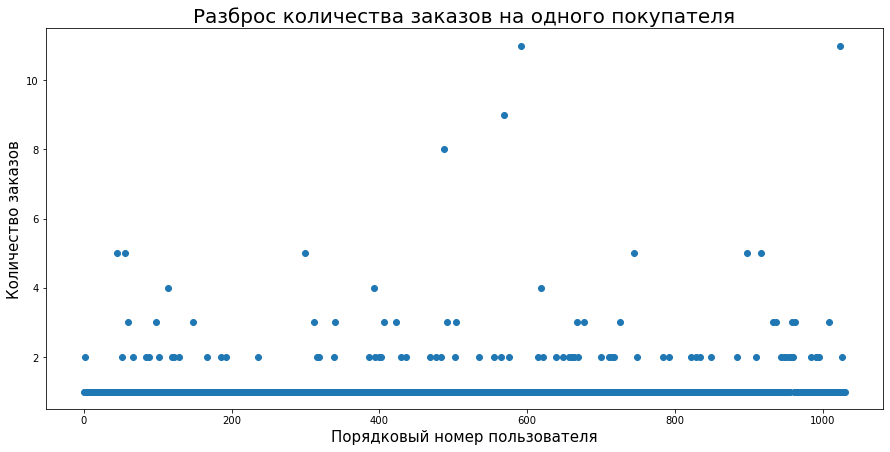

95% пользователей в среднем заказывали не чаще 2 раз
99% пользователей в среднем заказывали не чаще 4 раз


In [18]:
orders_by_users = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

orders_by_users.columns = ['userId', 'orders']

x_values_ord = pd.Series(range(0, len(orders_by_users)))

plt.figure(figsize=(15, 7))

plt.scatter(x_values_ord, orders_by_users['orders'])

plt.title('Разброс количества заказов на одного покупателя', fontsize=20)
plt.xlabel('Порядковый номер пользователя', fontsize=15)
plt.ylabel('Количество заказов', fontsize=15) 

plt.show()

print('95% пользователей в среднем заказывали не чаще {:.0f} раз'.format(np.percentile(orders_by_users['orders'], 95)))
print('99% пользователей в среднем заказывали не чаще {:.0f} раз'.format(np.percentile(orders_by_users['orders'], 99)))

В основном, пользователи заказывали по 1 разу в рассматриваемый период, однако некоторые возвращались и за повторными покупками, пусть и заметно реже. Будем считать пользователей с 4-мя заказами и более – аномалиями.

### Статистическая значимость

Найдём p-value конверсий и среднего чека у "сырых" и "очищенных" данных. Пороговым значением alpha будем считать 0.05

Соберём датафрейм с необходимыми для анализа данными.

In [19]:
visitors_A_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_A_daily.columns = ['date', 'visitors_per_date_A']

visitors_A_cummulative = visitors_A_daily.apply(
    lambda x: visitors_A_daily[visitors_A_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_A': 'sum'}
    ),
    axis=1,
)
visitors_A_cummulative.columns = ['date', 'visitors_cummulative_A']

visitors_B_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_B_daily.columns = ['date', 'visitors_per_date_B']

visitors_B_cummulative = visitors_B_daily.apply(
    lambda x: visitors_B_daily[visitors_B_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_B': 'sum'}
    ),
    axis=1,
)
visitors_B_cummulative.columns = ['date', 'visitors_cummulative_B']

orders_A_daily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
orders_A_daily.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A']

orders_A_cummulative = orders_A_daily.apply(
    lambda x: orders_A_daily[orders_A_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_A': 'sum', 'revenue_per_date_A': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_A_cummulative.columns = ['date', 'orders_cummulative_A', 'revenue_cummulative_A']

orders_B_daily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
orders_B_daily.columns = ['date', 'orders_per_date_B', 'revenue_per_date_B']

ordersBCummulative = orders_B_daily.apply(
    lambda x: orders_B_daily[orders_B_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_B': 'sum', 'revenue_per_date_B': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_B_daily.columns = ['date', 'orders_cummulative_B', 'revenue_cummulative_B']

data = (
    orders_A_daily.merge(
        orders_B_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_A_cummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_A_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_B_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_A_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_B_cummulative, left_on='date', right_on='date', how='left')
)


Найдём число пользователей в группах. И тех, которые делали заказы, и просто посетителей сайта.

In [20]:
orders_by_users_A = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
orders_by_users_A.columns = ['userId', 'orders']

orders_by_users_B = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
orders_by_users_B.columns = ['userId', 'orders']

sample_A = pd.concat(
    [
        orders_by_users_A['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_B = pd.concat(
    [
        orders_by_users_B['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#### Сравнение "сырых" данных

**Нулевая гипотеза:** статистически значимая разница в конверсии групп A/B-теста отсутствует.

**Обратная гипотеза:** конверсии групп A/B-теста статистически значимо отличаются.

In [21]:
print('p-value конверсий = {0:.3f}'.format(stats.mannwhitneyu(sample_A, sample_B, alternative = 'two-sided')[1]))

print('разница конверсий = {0:.3f}'.format(sample_B.mean() / sample_A.mean() - 1))

p-value конверсий = 0.017
разница конверсий = 0.138


P-value конверсий групп A и B меньше контрольных alpha в 0.05, то есть нулевую гипотезу о равенстве конверсий, исходя из сырых данных, отвергаем и сможем утверждать, что конверсия группы B больше.

**Нулевая гипотеза:** статистически значимая разница в среднем чеке групп A/B-теста отсутствует.

**Обратная гипотеза:** средний чек групп A/B-теста статистически значимо отличается.

In [22]:
print(
    'p-value среднего чека = {0:.3f}'
    .format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1])
)

print(
    'разница среднего чека = {0:.3f}'
    .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)
)

p-value среднего чека = 0.729
разница среднего чека = 0.259


P-value среднего чека больше 0.05, то есть отвергнуть нулевую гипотезу о равенстве среднего чека между группами нельзя. При том, что средний чек группы B значительно выше среднего чека группы A.

Впрочем, это были выводы по "сырым" данным. Избавимся от выбросов и взглянем на результаты ещё раз.

In [23]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_A[orders_by_users_A['orders'] > 3]['userId'],
        orders_by_users_B[orders_by_users_B['orders'] > 3]['userId'],
    ],
    axis=0,
)
users_with_expensive_orders = orders[orders['revenue'] > 58233]['visitorId']

abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [24]:
sample_A_filtered = pd.concat(
    [
        orders_by_users_A[
            np.logical_not(orders_by_users_A['userId'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_B_filtered = pd.concat(
    [
        orders_by_users_B[
            np.logical_not(orders_by_users_B['userId'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#### Сравнение "очищенных" данных

**Нулевая гипотеза:** статистически значимая разница в конверсии групп A/B-теста отсутствует.

**Обратная гипотеза:** конверсии групп A/B-теста статистически значимо отличаются.

In [25]:
print('p-value конверсий = {0:.3f}'.format(stats.mannwhitneyu(sample_A_filtered, sample_B_filtered, alternative = 'two-sided')[1]))
print('разница конверсий = {0:.3f}'.format(sample_B_filtered.mean()/sample_A_filtered.mean()-1))

p-value конверсий = 0.014
разница конверсий = 0.151


Результаты по конверсии практически не изменились, p-value по-прежнему меньше контрольного значения alpha в 0.05, значит, нулевую гипотезу об отсутствии статистически значимой разницы в конверсии по "отфильтрованным" от аномалий данным, отвергаем. Это говорит, что показатель конверсии не так сильно страдает от "выбросов" и аномалий в данных. Проверим как дела со средним чеком.

**Нулевая гипотеза:** статистически значимая разница в среднем чеке групп A/B-теста отсутствует.

**Обратная гипотеза:** средний чек групп A/B-теста статистически значимо отличается.

In [26]:
print(
    'p-value среднего чека = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormal_users)),
                )
            ]['revenue'], alternative = 'two-sided',
        )[1]
    )
)

print(
    'разница среднего чека = {0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value среднего чека = 0.959
разница среднего чека = -0.014


Избавившись от аномально дорогих покупок, искажающих результаты A/B-теста, мы получили ещё более высокий p-value по среднему чеку, что делает результат более достоверным. А так же разница в среднем чеке теперь в пользу группы A.

#### Вывод

- существует статистически значимое различие между группами по показателю конверсии как по "сырым", так и по "очищенным" данным. Эта разница в пользу группы B;
- различия групп по показателю среднего чека нет как в "сыром", так и в "очищенном" варианте. Но, при фильтрации аномалий, существенное преимущество группы B меняется на незначительное в пользу группы A;
- график "Отношение конверсии группы B к группе A" показывает, что проверяемая гипотеза увеличивает конверсию контрольной группы B;
- исходя их проверки статистической значимости и разницы средних показателей среднего чека, можно сделать вывод, что в проверяемая гипотеза не приводит к увеличению среднего чека контрольной группы B по сравнению с базовой группой A.

## Отчёт

На старте выполнения проекта, мы получили 3 дата фрейма:
   1. гипотезы с метриками;
   2. количество посетителей каждой группы во все дни проведения теста;
   3. список заказов, сделанных за время проведения теста, с указанием группы покупателя.

В ходе выполнения работы, мы импортировали данные, ознакомились с ними, оценили наличие пропусков и **обнаружили пересечения в группах покупателей**: то есть, в списке заказов групп A и B есть одни и те же покупатели. В реальной работе, мы бы приостановили тест, до устранения проблемы, так как этот факт критичен для достоверности результатов исследования. В рамках обучения, отметим это как урок на будущее, что подобную проверку стоит проводить всегда, чтобы не потерять в валидности и легитимности результатов исследования.

На этапе предобработки мы лишь заменили столбцы с датами на подходящий формат и узнали, что категориальные переменные не подвергаются ранжированию, то есть к ним не применимы математические методы типа 'max' и 'min'.

Далее мы приступили к ранжированию гипотез, предложенных маркетинговым отделом. По заранее известным оценкам (охват, влияние, уверенность, усилия) мы **оценили 9 гипотез, применив фреймворки ICE и RICE, получив итоговый рейтинг каждой**. Это помогло определиться с выбором, какую гипотезу нам следовало бы проверять первым делом в реальной работе аналитика.

После мы перешли к непосредственно анализу результатов A/B-теста:
   - найдя куммулятивные показатели, мы сравнили накопленные выручку, средний чек и конверсию по группам, а так же построили графики относительного изменения кумулятивного среднего чека и конверсии группы B к группе A. **Показатели группы B выглядят предпочтительнее, но на графиках видны "всплески".**
   - чтобы избавиться от статистических неточностей, мы провели анализ выбросов и всплесков. В результате, мы пришли к выводу, что **заказы дороже 58233 у.е. и количество заказов больше 3-х на одного пользователя за период проведения теста являются аномалиями** и их следует исключить из анализируемой области, чтобы повысить точность результатов и выводов.
   - при помощи статистического метода st.mannwhitneyu() (U-критерия Манна-Уитни), мы нашли статистические значимости гипотез о равенстве среднего чека и конверсий по "сырым" и "очищенным" данным. После сравнения полученных p-value с контрольным значением alpha = 0.05, мы можем утверждать, что:
       1. **статистически значимой разницы в показателе среднего чека групп A и B нет как в данных с "шумами", так и в выборке после фильтрации аномальных значений;**
       2. **существует статистически значимая разница в конверсии между группами A и B. Эта разница "в пользу" группы B.**

**Рекомендация:** A/B-тест можно завершать. Проверяемая гипотеза подходит для увеличения конверсии, но для роста среднего чека нужно придумать что-нибудь другое.